In [17]:
#Import all necessary libraries...
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load your Datasets
wine_data=pd.read_csv("C:\\Users\\khush\\Desktop\\Data Analysts\\OASIS INFOBYTE\\Wine Prediction\\Datasets\\WineQT.csv")

In [4]:
wine_data.head()#Print the top 5 rows of datasets

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 102.8 KB


In [5]:
wine_data.drop(columns='Id', inplace=True)

In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Above analysis shows that there is no null values..

In [9]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Data Visualization

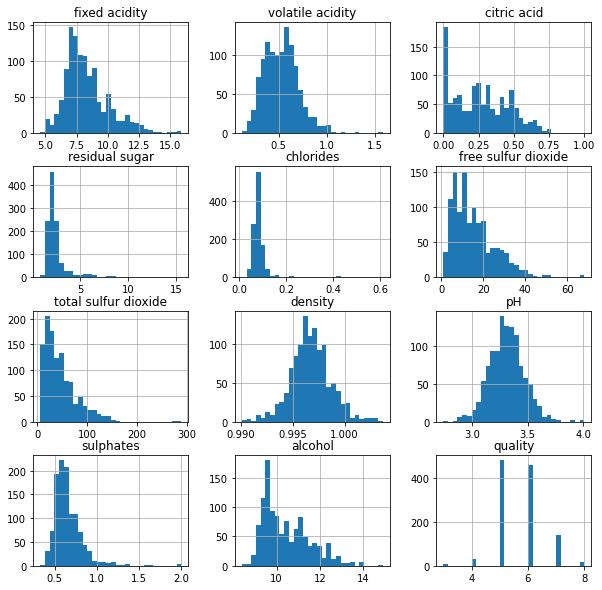

In [12]:
wine_data.hist(bins=30, figsize=(10,10))
plt.show()

Analyzing features like density and acidity as predictors for wine quality

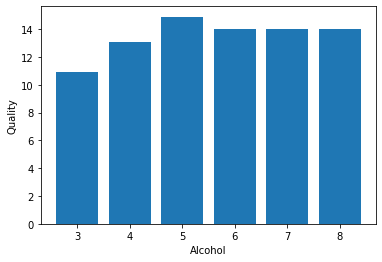

In [15]:
plt.bar(wine_data['quality'], wine_data['alcohol'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

C:\Users\khush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

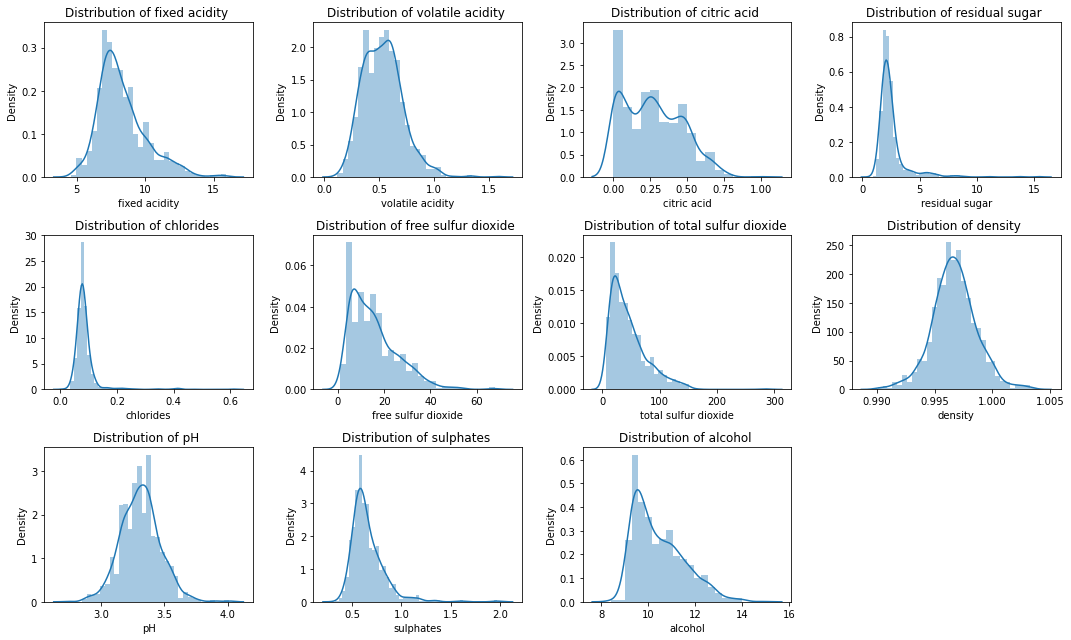

In [58]:
# Check the distribution of all features
fig, ax = plt.subplots(figsize=(15, 9))

for i, col in enumerate(wine_data.columns, 1):
    if col != 'quality':
        plt.subplot(3, 4, i)

        ax = sns.distplot(wine_data[col])
        plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()

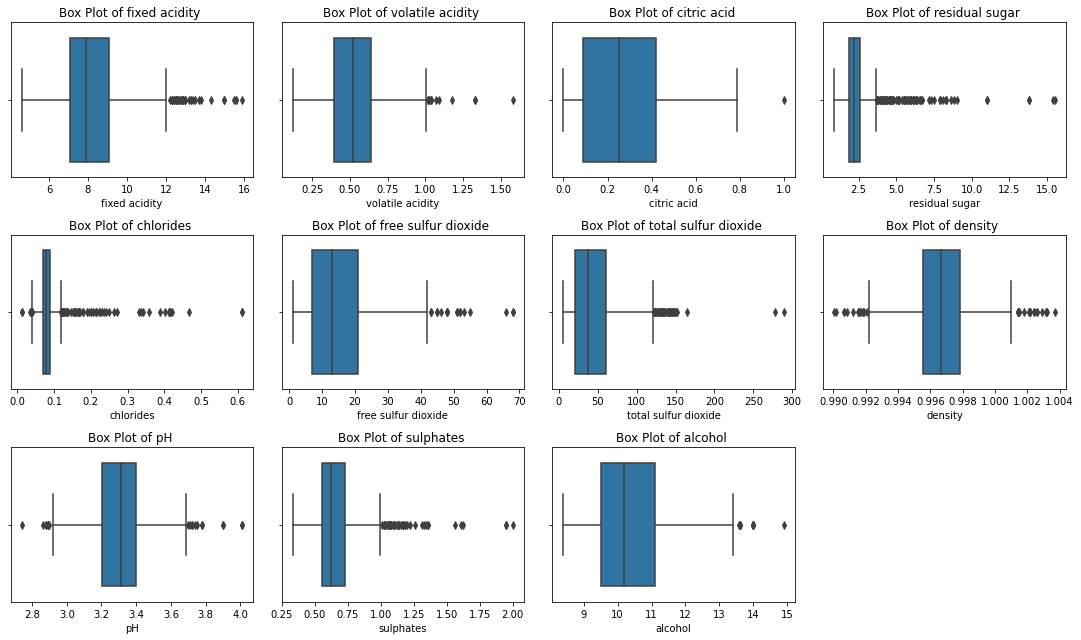

In [59]:
fig, ax = plt.subplots(figsize=(15, 9))

for i, col in enumerate(wine_data.columns, 1):
    if col != 'quality':
        plt.subplot(3, 4, i)

        ax = sns.boxplot(x=wine_data[col])
        plt.title(f'Box Plot of {col} ')

plt.tight_layout()
plt.show()


# Correlations

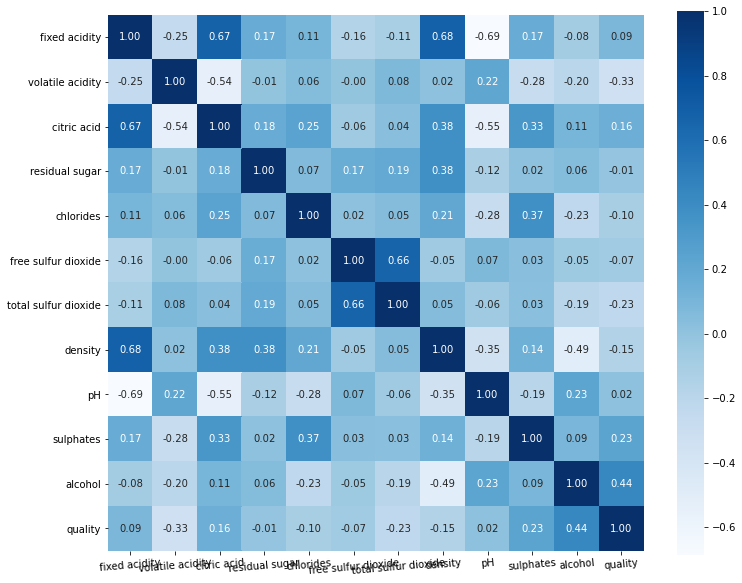

In [60]:
plt.figure(figsize=(12, 10))

sns.heatmap(wine_data.corr(), fmt='.2f', cmap='Blues', cbar=True, annot=True,  square=True)
plt.xticks(rotation=5) 

plt.show()

In [62]:
# check the correlation with the target variable
target_corr = wine_data.corr()['quality'].sort_values(ascending=False)
target_corr

quality                 1.000000
alcohol                 0.440397
sulphates               0.234221
citric acid             0.155144
fixed acidity           0.088682
pH                      0.015251
residual sugar         -0.007732
free sulfur dioxide    -0.070577
chlorides              -0.100601
density                -0.154255
total sulfur dioxide   -0.226680
volatile acidity       -0.330787
Name: quality, dtype: float64

# Model Classifications

In [19]:
wine_data['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [20]:
wine_data['quality'] = np.where(wine_data['quality']>5, 1, 0)

In [21]:
wine_data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

In [23]:
# Assume 'quality' is the target variable and other columns are features
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()#

In [28]:
# Split Data
#Split the data into training and testing sets to evaluate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Fit scaler on training data and transform both training and testing data
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [40]:
scaled_x_train.shape#Obtained the shape of train data

(800, 11)

In [41]:
# 4. Model Training
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Stochastic Gradient Descent Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [43]:
# Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [44]:
# 5. Model Evaluation
# Evaluate Random Forest Classifier
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluate Stochastic Gradient Descent Classifier
sgd_predictions = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print("\nStochastic Gradient Descent Accuracy:", sgd_accuracy)
print("Stochastic Gradient Descent Classification Report:")
print(classification_report(y_test, sgd_predictions))

# Evaluate Support Vector Classifier
svc_predictions = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("\nSupport Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Classification Report:")
print(classification_report(y_test, svc_predictions))

Random Forest Accuracy: 0.7725947521865889
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       152
           1       0.82      0.75      0.79       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.78      0.77      0.77       343


Stochastic Gradient Descent Accuracy: 0.6501457725947521
Stochastic Gradient Descent Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       152
           1       0.82      0.48      0.60       191

    accuracy                           0.65       343
   macro avg       0.69      0.67      0.65       343
weighted avg       0.71      0.65      0.64       343


Support Vector Classifier Accuracy: 0.7434402332361516
Support Vector Classifier Classification Report:
              precision    recall  f1-score   suppor

In [70]:
#compare results
# Accuracy scores obtained from model evaluations
accuracy_scores = [0.7725947521865889, 0.6501457725947521, 0.7434402332361516]

# Define the models
models = ['Random Forest', 'Stochastic Gradient Descent', 'Support Vector Classifier']

# Create a DataFrame from the lists
results_data = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores})

# Sort the DataFrame by the 'Accuracy' column in descending order
results_data_sorted = results_data.sort_values(by='Accuracy', ascending=False)

print(results_data_sorted)


                         Model  Accuracy
0                Random Forest  0.772595
2    Support Vector Classifier  0.743440
1  Stochastic Gradient Descent  0.650146
